In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

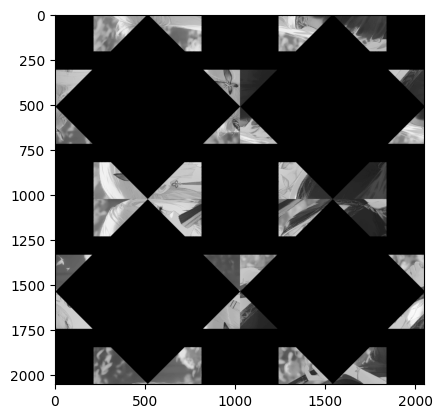

In [2]:
img = plt.imread("senheScramble.jpg")
plt.imshow(img, cmap='gray')

In [3]:
def split4 (img):
     height, width = img.shape[:2]
     mid_h, mid_w = height // 2, width // 2
     part1 = img[:mid_h, :mid_w]
     part2 = img[:mid_h, mid_w:]
     part3 = img[mid_h:, :mid_w]
     part4 = img[mid_h:, mid_w:]

     return [part1, part2, part3, part4]

In [4]:
def rotation(image, sudut):
     result = np.zeros(image.shape)
     degree = sudut*(np.pi/180)

     mid_x = image.shape[1]//2
     mid_y = image.shape[0]//2

     for i in range(image.shape[0]):
          for j in range(image.shape[1]):
               x2 = int((i - mid_x) * np.cos(degree) - (j - mid_y) * np.sin(degree) + mid_x) 
               y2 = int((i - mid_x) * np.sin(degree) + (j - mid_y) * np.cos(degree) + mid_x)
               if 0 <= x2 < image.shape[0] and 0 <= y2 < image.shape[1]:
                    result[i][j] =  image[x2][y2]
     return result

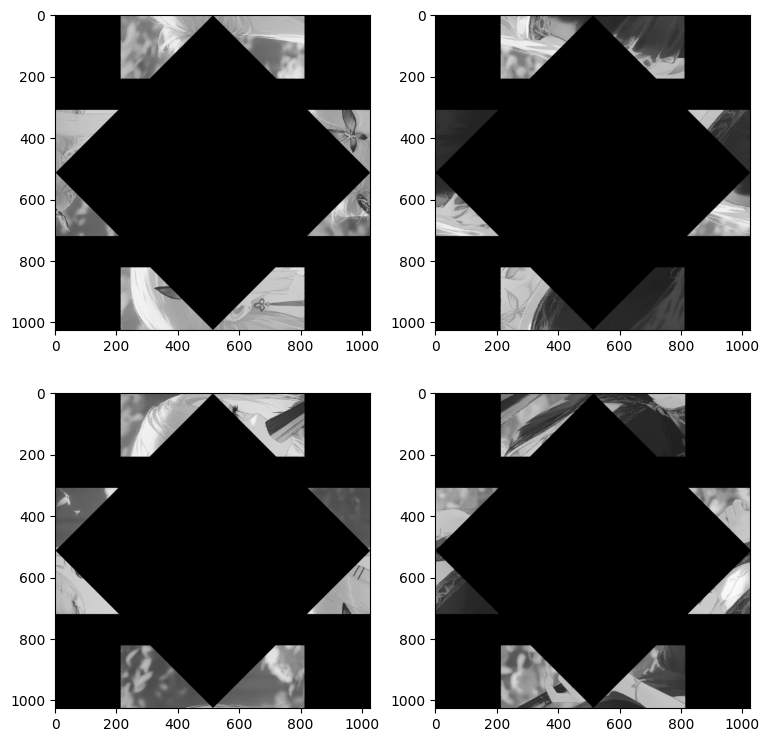

In [5]:
part = []
part = split4(img)
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
plt.imshow(part[0],cmap='gray')
plt.subplot(2,2,2)
plt.imshow(part[1],cmap='gray')
plt.subplot(2,2,3)
plt.imshow(part[2],cmap='gray')
plt.subplot(2,2,4)
plt.imshow(part[3],cmap='gray')


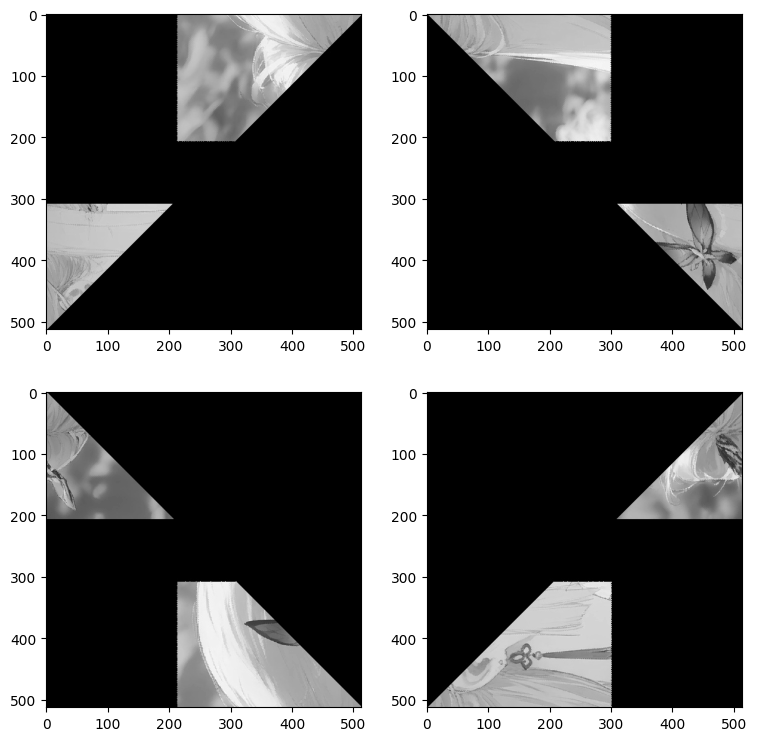

In [6]:
part11, part12, part13, part14 = split4(part[0])
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
plt.imshow(part11,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(part12,cmap='gray')
plt.subplot(2,2,3)
plt.imshow(part13,cmap='gray')
plt.subplot(2,2,4)
plt.imshow(part14,cmap='gray')

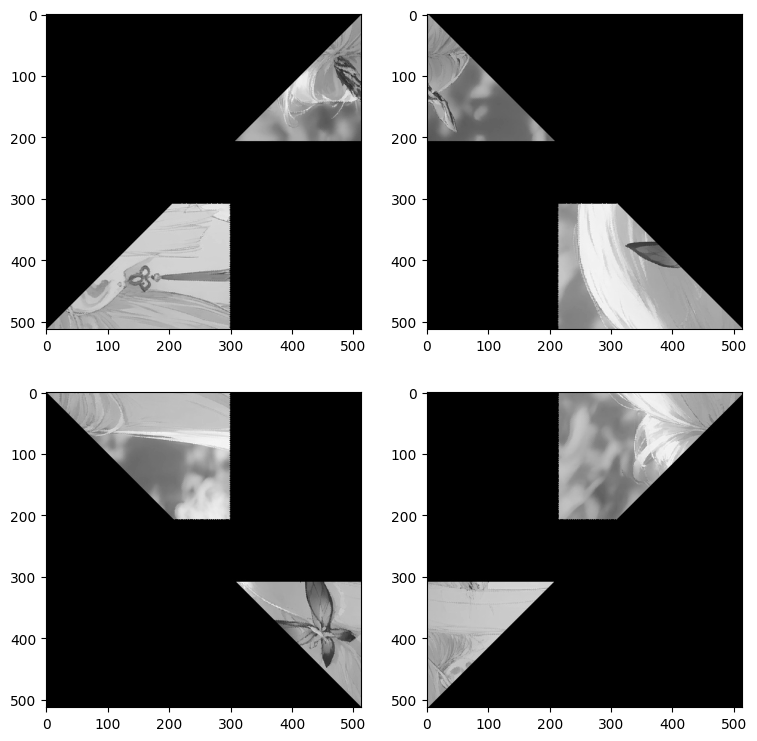

In [7]:

plt.figure(figsize=(9,9))
plt.subplot(2,2,4)
plt.imshow(part11,cmap='gray')
plt.subplot(2,2,3)
plt.imshow(part12,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(part13,cmap='gray')
plt.subplot(2,2,1)
plt.imshow(part14,cmap='gray')

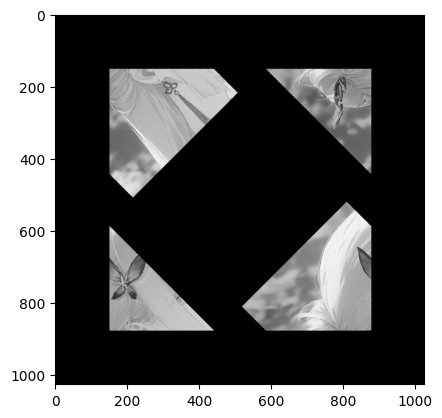

In [8]:
test = np.concatenate((np.concatenate((part14, part13), axis=1), np.concatenate((part12, part11), axis=1)), axis=0)
test = rotation(test,45)
plt.imshow(test,cmap='gray')

In [9]:
def crop_img(img):
     top, bottom, left, right = 0, img.shape[0], 0, img.shape[1]
     for i in range(img.shape[0]):
          for j in range(img.shape[1]):
               if img[i, j] > 100:
                    top = i
                    break
          if top != 0:
               break

# Looping untuk mencari batas bawah (bottom)
     for i in range(img.shape[0] - 1, -1, -1):
          for j in range(img.shape[1]):
               if img[i, j] > 100:
                    bottom = i
                    break
          if bottom != img.shape[0]:
               break

# Looping untuk mencari batas kiri (left)
     for j in range(img.shape[1]):
          for i in range(img.shape[0]):
               if img[i, j] > 100:
                    left = j
                    break
          if left != 0:
               break

# Looping untuk mencari batas kanan (right)
     for j in range(img.shape[1] - 1, -1, -1):
          for i in range(img.shape[0]):
               if img[i, j] > 100:
                    right = j
                    break
          if right != img.shape[1]:
               break

# Crop citra menggunakan batas yang telah ditentukan
     result = img[top:bottom+1, left:right]
     return result

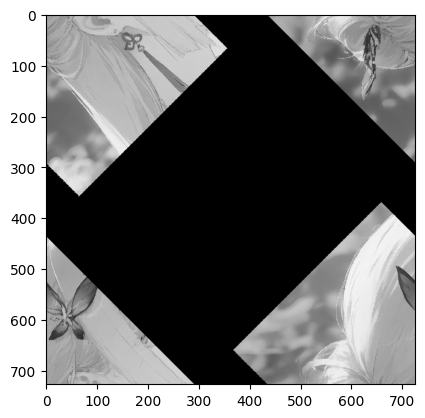

In [10]:
cropped_image = crop_img(test)
plt.imshow(cropped_image,cmap='gray')

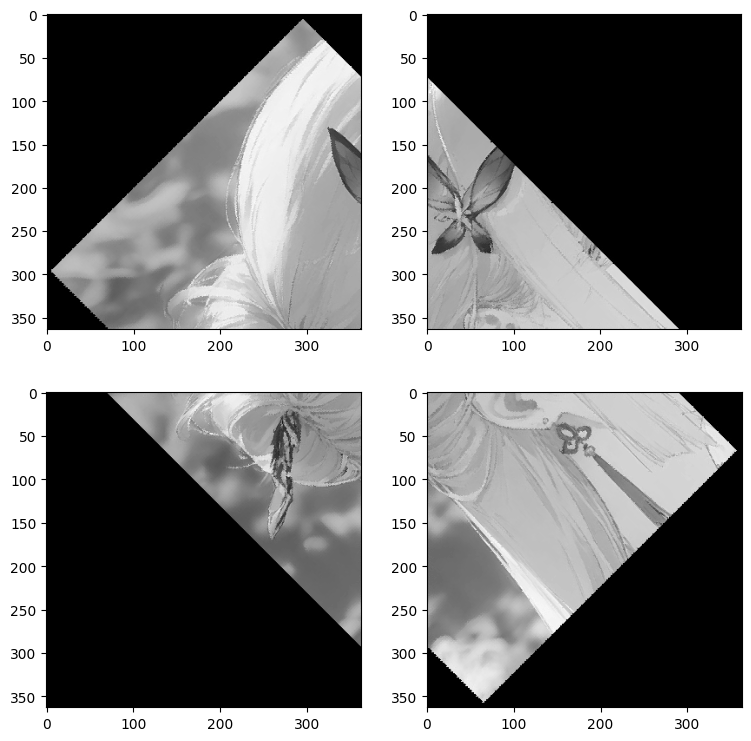

In [11]:
a,b,c,d = split4(cropped_image)
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
plt.imshow(d,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(c,cmap='gray')
plt.subplot(2,2,3)
plt.imshow(b,cmap='gray')
plt.subplot(2,2,4)
plt.imshow(a,cmap='gray')

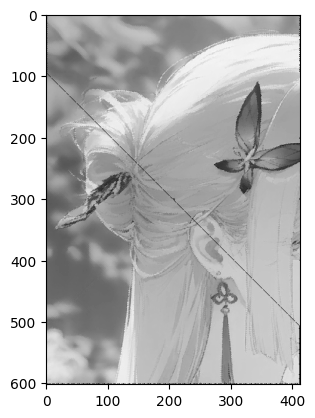

In [12]:
test = np.concatenate((np.concatenate((d, c), axis=1), np.concatenate((b, a), axis=1)), axis=0)
test = rotation(test,45)
test = crop_img(test)
plt.imshow(test,cmap='gray')

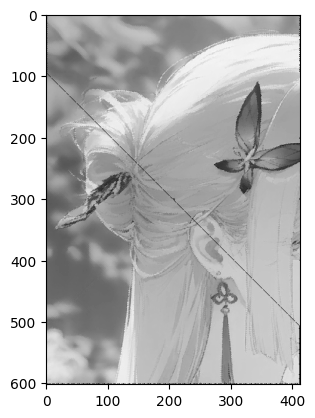

In [13]:
part = split4(img)

subpart = split4(part[0])
part[0] = np.concatenate((np.concatenate((subpart[3], subpart[2]), axis=1), np.concatenate((subpart[1], subpart[0]), axis=1)), axis=0)
part[0] = rotation(part[0], 45)
part[0] = crop_img(part[0])

subpart = split4(part[0])
part[0] = np.concatenate((np.concatenate((subpart[3], subpart[2]), axis=1), np.concatenate((subpart[1], subpart[0]), axis=1)), axis=0)
part[0] = rotation(part[0], 45)
part[0] = crop_img(part[0])

plt.imshow(part[0], cmap='gray')  

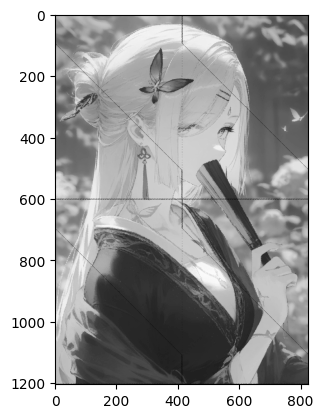

In [14]:
part = split4(img)
for index, item in enumerate(part):
     subpart = split4(item)
     part[index] = np.concatenate((np.concatenate((subpart[3], subpart[2]), axis=1), np.concatenate((subpart[1], subpart[0]), axis=1)), axis=0)
     part[index] = rotation(part[index], 45)
     part[index] = crop_img(part[index])

     subpart = split4(part[index])
     part[index] = np.concatenate((np.concatenate((subpart[3], subpart[2]), axis=1), np.concatenate((subpart[1], subpart[0]), axis=1)), axis=0)
     part[index] = rotation(part[index], 45)
     part[index] = crop_img(part[index])

image = np.concatenate((np.concatenate((part[0], part[2]), axis=1), np.concatenate((part[1], part[3]), axis=1)), axis=0)
plt.imshow(image, cmap='gray')  
